In [1]:
import pandas as pd

In [2]:
cr = pd.read_csv(r'D:\imarticus\deep learning\mnist_train.csv')

In [3]:
cr.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cr.shape

(60000, 785)

In [6]:
cr.label.value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [7]:
import numpy as np

# only for plotting

In [8]:
mnist1 = cr.iloc[:,1::]

In [11]:
mnist1.shape

(60000, 784)

In [12]:
mnist1.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mnist1 = np.array(mnist1)

In [14]:
type(mnist1)

numpy.ndarray

In [19]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

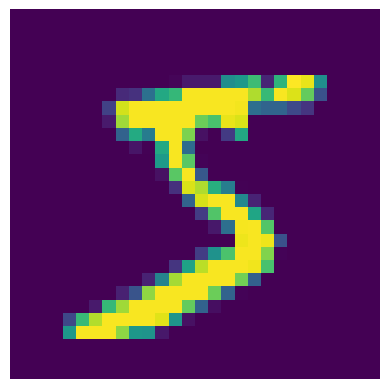

In [21]:
var1 = mnist1[0]
plt.imshow(var1.reshape(28,28))
plt.axis('off')

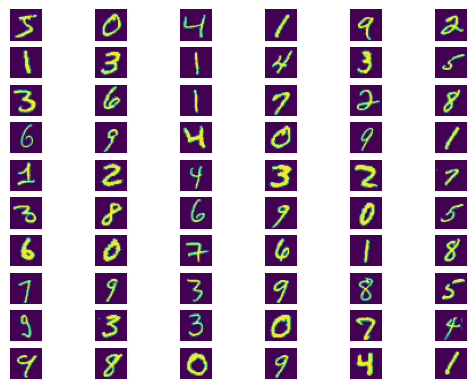

In [22]:
for i in range(60):
    plt.subplot(10,6,i+1)
    plt.imshow(mnist1[i ,:].reshape(28,28))
    plt.axis('off')

# code for model building

In [23]:
cr = pd.read_csv(r'D:\imarticus\deep learning\mnist_train.csv')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
mnist_train,mnist_test = train_test_split(cr,test_size = .25)

In [26]:
mnist_train_x = mnist_train.iloc[:,1::]
mnist_train_y = mnist_train.iloc[:,0]

mnist_test_x = mnist_test.iloc[:,1::]
mnist_test_y = mnist_test.iloc[:,0]

In [27]:

mnist_train_x = np.array(mnist_train_x)
mnist_train_y = np.array(mnist_train_y)
mnist_test_x = np.array(mnist_test_x)


In [29]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 610.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 4.5 MB/s eta 0:01:28
   ---------------------------------------- 0.2/390.3 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 0.3/390.3 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.7/390.3 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 1.1/390.3 MB 5.4 MB/s eta 0:01:13
   ---------------------------------------- 1.5/390.3 MB 6.1 MB/s eta 0:01:05
   ---------------------------------------- 2.1/390.3 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 2.9/390.3 MB 8.4 MB/s eta 0:00:47
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
import tensorflow as tf
import keras

In [31]:
tf.__version__

'2.18.0'

In [142]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu)) # hidden layer 1
model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu)) # hidden layer 2
model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu)) # hidden layer 3
model.add(tf.keras.layers.Dense(512,activation = tf.nn.relu)) # hidden layer 4
model.add(tf.keras.layers.Dense(512,activation = tf.nn.softmax)) # output layer- we have 10 output so we use 10
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [143]:
model.fit(mnist_train_x,mnist_train_y,epochs=15,validation_split=.2,batch_size = 200)

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7490 - loss: 5.1199 - val_accuracy: 0.9346 - val_loss: 0.2180
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9674 - loss: 0.1130 - val_accuracy: 0.9491 - val_loss: 0.1739
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9813 - loss: 0.0573 - val_accuracy: 0.9541 - val_loss: 0.1721
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9526 - val_loss: 0.1940
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9564 - val_loss: 0.1964
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9598 - val_loss: 0.1805
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.9603 - val_loss: 0.1824
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9872 - loss: 0.0448 - val_accu

In [144]:
pred = model.predict(mnist_test_x)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [145]:
pred_cat = pred.argmax(axis=1)

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
tab = confusion_matrix(mnist_test_y,pred_cat)

In [148]:
tab

array([[1359,    1,    3,    3,    3,    2,    6,    0,    3,    4],
       [   0, 1632,   15,    3,    3,    0,    1,    2,    4,    0],
       [   8,    0, 1476,    6,    4,    0,    3,    3,    2,    1],
       [   0,    2,   35, 1528,    0,    8,    0,    1,   21,    3],
       [   2,    3,    6,    0, 1503,    0,    9,    3,    1,   11],
       [   5,    0,    1,   44,    9, 1268,    7,    2,   12,    1],
       [   6,    3,   11,    0,    5,    9, 1445,    0,    4,    0],
       [   1,    5,   34,    3,    9,    2,    0, 1523,    0,    6],
       [   4,   12,   31,    5,   20,    8,    5,    5, 1355,   15],
       [   2,    2,    9,   11,   41,    3,    0,   22,   18, 1334]],
      dtype=int64)

In [149]:
import numpy as np

In [150]:
accuracy = tab.diagonal().sum()/tab.sum()
print('accuracy of the model',accuracy)

accuracy of the model 0.9615333333333334
